# Example MKP waveform data extraction from SPS with sparks

### Connect to the cluster (NXCals)

To connect to a cluster, click on the star button on the top and follow the instructions
* The star button only appears if you have selected a SPARK cluster in the configuration
* The star button is active after the notebook kernel is ready

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import dateutil
import pandas as pd

### Read the NxCALS device properties into spark dataframe

We want the waveform data from the device MKP.BA1.IPOC.TMR1A, and plot it. 

In [3]:
# source the nxcals python libs
import pandas as pd
from cern.nxcals.pyquery.builders import *

#Arrays with MKP names --> can be checked on https://ccde.cern.ch/
mkps = ['1A','1B','2A','2B','3A','3B','4A','4B','5A','5B','6A','6B','7A','7B','8A','8B']
df_list = list()

#LAST WEEK TRY!

#Loop over the different MKPs, create arrays of dataframes
for ele in mkps:
    df = DevicePropertyQuery.builder(spark).system("CMW") \
            .startTime("2021-10-18 17:20:00.000") \
            .endTime("2021-10-18 17:30:00.000") \
            .entity().parameter("MKP.BA1.IPOC.TMR{}/Waveform".format(ele)) \
            .build()  
    
    df_list.append(df)



#Alternative but slower method to load the data
"""
# build the query and load data into spark dataframe
df = DataQuery.builder(spark).byVariables().system("CMW") \
            .startTime("2021-05-23 23:50:00.000") \
            .endTime("2021-05-24 00:00:00.000") \
            .variable("MKP.BA1.IPOC.TMR1A:Waveform:waveformData") \
            .build()  
"""

'\n# build the query and load data into spark dataframe\ndf = DataQuery.builder(spark).byVariables().system("CMW")             .startTime("2021-05-23 23:50:00.000")             .endTime("2021-05-24 00:00:00.000")             .variable("MKP.BA1.IPOC.TMR1A:Waveform:waveformData")             .build()  \n'

In [4]:
#Extract needed parameters to Pandas 
p_df_list = list()
i = 0

for ele in mkps:
    df_loop = df_list[i]
    p_df = df_loop.select("waveformData", "waveformTime", "selector", "__record_timestamp__").toPandas()  
    p_df_list.append(p_df)
    i = i+1

Select the element data from the nested dictionary:

In [5]:
i = 0

for ele in mkps:
    p_df_list[i]["waveformData"] = p_df_list[i]["waveformData"].apply(lambda x: x["elements"] if x is not None else None)
    i = i+1

### Displaying and plotting data

In [21]:
p_df_list[1].head(20)

waveformData  \
0   [-0.001220703125, 0.001220703125, 0.0012207031...   
1   [0.00244140625, -0.001220703125, 0.0, -0.00244...   
2   [-0.001220703125, 0.006103515625, 0.0012207031...   
3   [-0.00244140625, -0.0048828125, 0.00244140625,...   
4   [0.0048828125, -0.00244140625, 0.00244140625, ...   
5   [0.0, 0.0, -0.003662109375, 0.00244140625, -0....   
6   [-0.003662109375, -0.006103515625, 0.001220703...   
7   [0.0, 0.00244140625, -0.00244140625, -0.002441...   
8   [-0.0048828125, -0.00244140625, -0.00244140625...   
9   [0.0, -0.001220703125, -0.0048828125, -0.00366...   
10  [-0.00244140625, -0.003662109375, 0.0024414062...   
11  [0.0, 0.003662109375, 0.003662109375, 0.002441...   
12  [0.001220703125, -0.003662109375, 0.0012207031...   
13  [0.001220703125, 0.0, -0.0048828125, -0.003662...   
14  [0.0, 0.0, -0.001220703125, 0.001220703125, 0....   
15  [0.00244140625, 0.0, 0.003662109375, 0.0036621...   
16  [0.0, 0.0, 0.003662109375, -0.001220703125, 0....   
17  [-0.001220703125, 0.0, -0.003662109375, 0.0, -...   
18  [-0.001220703125, 0.0, 0.003662109375, -0.0012...   
19  [0.00244140625, -0.001220703125, 0.00244140625...   

                           waveformTime           selector  \
0   {'elements': [], 'dimensions': [0]}   SPS.USER.SFTPRO1   
1   {'elements': [], 'dimensions': [0]}   SPS.USER.SFTPRO1   
2   {'elements': [], 'dimensions': [0]}  SPS.USER.LHCPILOT   
3   {'elements': [], 'dimensions': [0]}   SPS.USER.SFTPRO1   
4   {'elements': [], 'dimensions': [0]}   SPS.USER.SFTPRO1   
5   {'elements': [], 'dimensions': [0]}   SPS.USER.SFTPRO1   
6   {'elements': [], 'dimensions': [0]}   SPS.USER.LHCION1   
7   {'elements': [], 'dimensions': [0]}       SPS.USER.MD2   
8   {'elements': [], 'dimensions': [0]}   SPS.USER.SFTPRO1   
9   {'elements': [], 'dimensions': [0]}   SPS.USER.SFTPRO1   
10  {'elements': [], 'dimensions': [0]}   SPS.USER.LHCION1   
11  {'elements': [], 'dimensions': [0]}    SPS.USER.AWAKE1   
12  {'elements': [], 'dimensions': [0]}    SPS.USER.AWAKE1   
13  {'elements': [], 'dimensions': [0]}   SPS.USER.SFTPRO1   
14  {'elements': [], 'dimensions': [0]}    SPS.USER.AWAKE1   
15  {'elements': [], 'dimensions': [0]}    SPS.USER.AWAKE1   
16  {'elements': [], 'dimensions': [0]}   SPS.USER.SFTPRO1   
17  {'elements': [], 'dimensions': [0]}   SPS.USER.SFTPRO1   
18  {'elements': [], 'dimensions': [0]}    SPS.USER.AWAKE1   
19  {'elements': [], 'dimensions': [0]}    SPS.USER.AWAKE1   

    __record_timestamp__  
0    1634577705936048600  
1    1634577740736048600  
2    1634577893951036825  
3    1634577966336048600  
4    1634578022736048600  
5    1634578135536048600  
6    1634577606861031150  
7    1634577635951040050  
8    1634577642336048600  
9    1634577643536037475  
10   1634577674061031150  
11   1634577717551023525  
12   1634577752351029750  
13   1634577798336037475  
14   1634577865151041225  
15   1634577886751029175  
16   1634577932736037475  
17   1634578044336048600  
18   1634578055951034850  
19   1634578147151035275

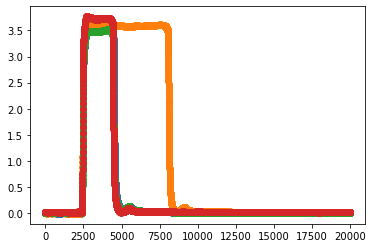

In [7]:
#Inspect the LHC pilot data
plt.figure()
plt.plot(p_df_list[0].loc[8].waveformData, "o")
plt.plot(p_df_list[1].loc[8].waveformData, "o")
plt.plot(p_df_list[2].loc[8].waveformData, "o")
plt.plot(p_df_list[3].loc[8].waveformData, "o")
#plt.ylim(8,11)
#plt.xlim(35000, 40000)
plt.show()

The data from the selector **lhcpilot** contain a clear boxcar-shaped peak. Save the relevant test data for easy access.

**Remember to iterate over i:s for p_df_list[i].loc[j], where i corresponds to the MKP and j to the selector --> however, the selector does not always have the same index for different MKPs**

**Total of 2 times 8 = 16 MKP units**

Regarding the time, it is just an array of 2 ns steps.

DOUBLE-CHECK SELECTOR, DOES NOT ALWAYS SEEM TO HAVE THE SAME INDEX --> use same timestamp instead

## Selecting LHCPILOT data with the same timestamp

We select the subset where the selector is SPS.USER.LHCPILOT, however there are many such datasets for the loaded dataframe. Decide one timestamp for all MKPs, then iterate over the MKPS and save this data.

In [36]:
p_df_list[0][p_df_list[0]['selector'] == "SPS.USER.LHCPILOT"]

waveformData  \
8   [0.0, 0.0, 0.00244140625, 0.0, -0.00244140625,...   
12  [-0.001220703125, 0.0, 0.001220703125, -0.0024...   
24  [-0.001220703125, 0.001220703125, 0.0024414062...   
30  [-0.0048828125, -0.0048828125, -0.0048828125, ...   
38  [0.001220703125, -0.00732421875, -0.0024414062...   
40  [0.006103515625, -0.003662109375, -0.002441406...   
42  [-0.0048828125, -0.00244140625, 0.00244140625,...   
57  [-0.001220703125, -0.001220703125, -0.00122070...   
60  [-0.003662109375, 0.001220703125, 0.0036621093...   
66  [0.0, -0.00244140625, 0.003662109375, 0.001220...   

                           waveformTime           selector  \
8   {'elements': [], 'dimensions': [0]}  SPS.USER.LHCPILOT   
12  {'elements': [], 'dimensions': [0]}  SPS.USER.LHCPILOT   
24  {'elements': [], 'dimensions': [0]}  SPS.USER.LHCPILOT   
30  {'elements': [], 'dimensions': [0]}  SPS.USER.LHCPILOT   
38  {'elements': [], 'dimensions': [0]}  SPS.USER.LHCPILOT   
40  {'elements': [], 'dimensions': [0]}  SPS.USER.LHCPILOT   
42  {'elements': [], 'dimensions': [0]}  SPS.USER.LHCPILOT   
57  {'elements': [], 'dimensions': [0]}  SPS.USER.LHCPILOT   
60  {'elements': [], 'dimensions': [0]}  SPS.USER.LHCPILOT   
66  {'elements': [], 'dimensions': [0]}  SPS.USER.LHCPILOT   

    __record_timestamp__  
8    1634577950351025850  
12   1634578119551031250  
24   1634577893951036825  
30   1634577661151029500  
38   1634578063151041175  
40   1634578175951023550  
42   1634577781151031400  
57   1634578006751032400  
60   1634577837551026975  
66   1634577724751021500

In [55]:
#Pick timestamp for all the MKP waveform data 
timestamp = p_df_list[0].iloc[8].__record_timestamp__

#Save all these waveforms in zero-dimensional numpy arrays
mkp_data_lhcpilot = []
for i in range(len(mkps)):
    mkp = np.squeeze(p_df_list[i][p_df_list[i]['__record_timestamp__'] == timestamp].waveformData)
    mkp_data_lhcpilot.append(mkp)
    np.savetxt("example_data/sps_lhcpilot_mkp{}_data.csv".format(i+1), mkp, delimiter=" ")

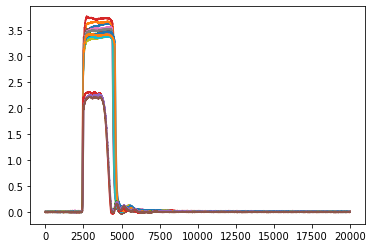

In [56]:
#Check all the waveforms of the SPS.USER.MD4 selector 
plt.figure()
for i in range(len(mkps)):
    plt.plot(mkp_data_lhcpilot[i], '')
#plt.xlim(35000, 43000)
plt.show()